In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0, 0.5, 'feature 2')

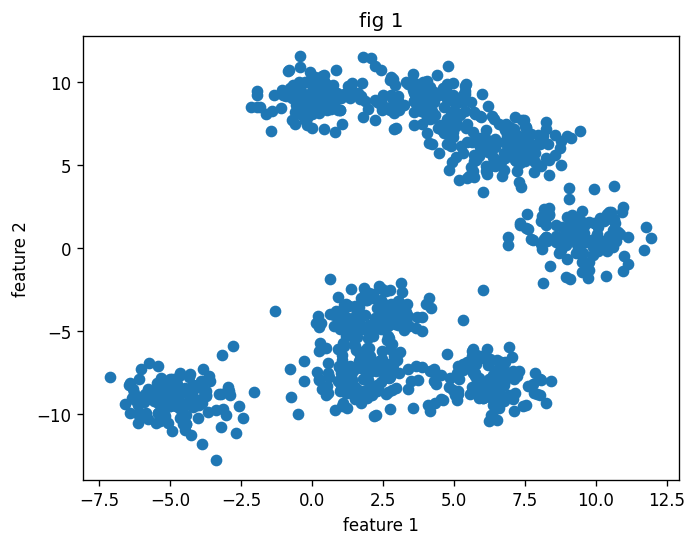

In [5]:
n_features = 2
centers = 8
X,y = make_blobs(n_samples=1000, centers=centers, n_features=n_features, random_state=68)

df = pd.DataFrame(X, columns=[*[f'feature_{i}' for i in range(n_features)]])
#ploting the data

plt.figure(dpi=120)
x1 = df['feature_0']
x2 = df['feature_1']

plt.scatter(x1,x2)
plt.title('fig 1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')



### scaling

In [6]:
# scaler object
scaler = StandardScaler()

#scaling the data
X_scaled = scaler.fit_transform(df)

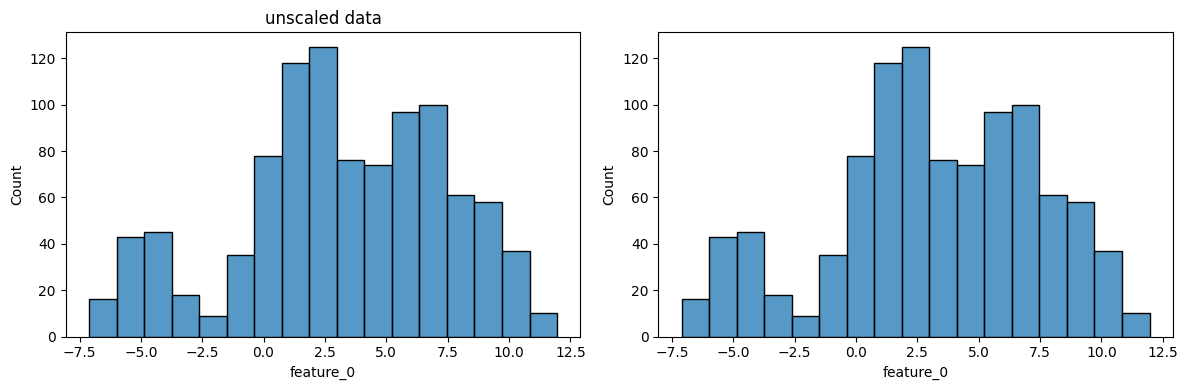

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df.iloc[:,0])
plt.title('unscaled data')
plt.gca().set_aspect('auto', adjustable='box')

plt.subplot(1,2,2)
sns.histplot(df.iloc[:,0])
plt.gca().set_aspect('auto', adjustable='box')
plt.tight_layout()
plt.show()

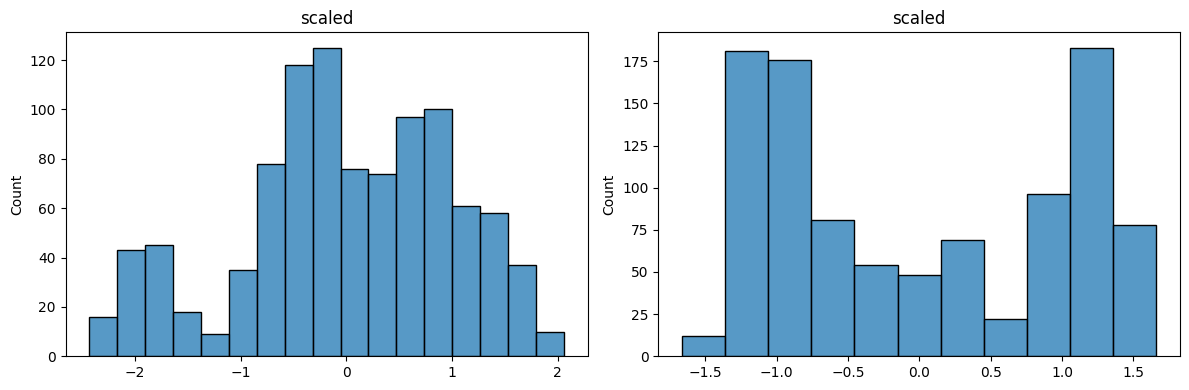

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(X_scaled[:,0])
plt.title('scaled')
plt.gca().set_aspect('auto' , adjustable='box')

plt.subplot(1,2,2)
sns.histplot(X_scaled[:,1])
plt.title('scaled')
plt.gca().set_aspect('auto', adjustable='box')

plt.tight_layout()
plt.show()

#### Generating a Dandrogram

In [18]:
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

In [19]:
#performing hierachial clustering
l_matrix = sch.linkage(X_scaled, method='average', metric='euclidean')

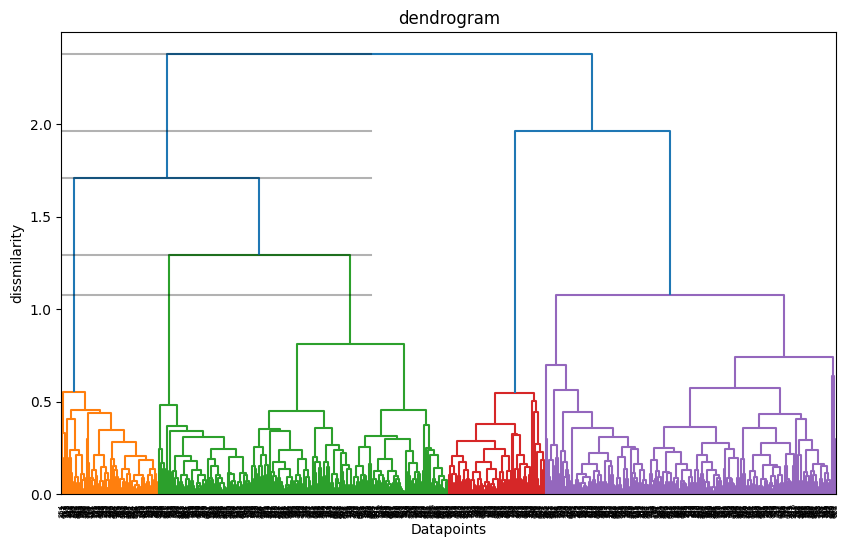

In [22]:
# generating and ploting the dendrogram
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(l_matrix)
z = l_matrix[:,2]
for i in range(1,6):
    rng = [z[-i],z[-i]]
    dom = [0,4000]
    plt.plot(dom,rng, 'black', alpha=0.3)

plt.title('dendrogram')
plt.xlabel('Datapoints')
plt.ylabel('dissmilarity')

plt.show()

#### Agglomerative clustering 

In [24]:
from sklearn.cluster import AgglomerativeClustering as ac
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
K = 4
hc = AgglomerativeClustering(n_clusters=K, linkage='average', metric='euclidean').fit(X_scaled)
df['cluster_label']  = hc.labels_ 
df['cluster_label'] = df['cluster_label'].astype('int64')

In [25]:
k = 4
hc = ac(n_clusters=k, linkage='average',metric='euclidean')
hc_ = hc.fit(X_scaled)
df['cluster_label']= hc_.labels_
df['cluster_label']= df['cluster_label'].astype('int64')

In [ ]:
# plot data
plt.figure(dpi=120)
for k in range(K):
    x1 = df[df['cluster_label'] == k]['feature_0']
    x2 = df[df['cluster_label'] == k]['feature_1']
    plt.scatter(x1, x2, label="k = "+str(k+1))


plt.legend()
plt.title("K = 4")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'feature 2')

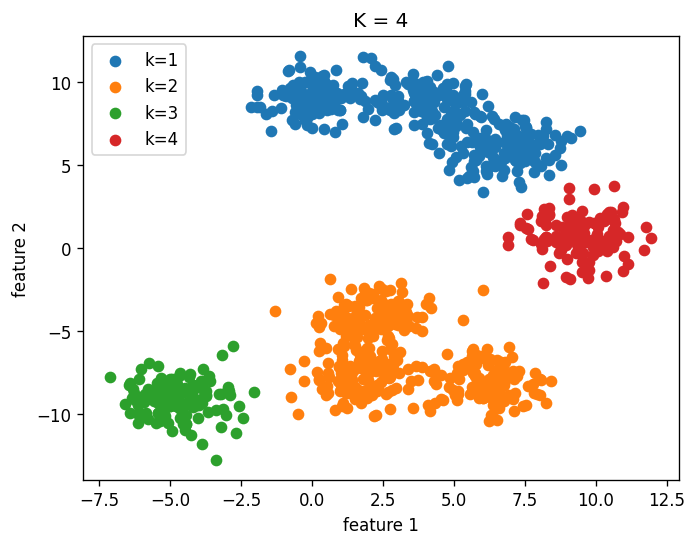

In [28]:
#ploting the data
plt.figure(dpi=120)
for k in range(k):
    x1 =df[df['cluster_label']==k]['feature_0']
    x2 = df[df['cluster_label']==k]['feature_1']
    plt.scatter(x1,x2, label="k=" +str(k+1))

plt.legend()
plt.title('K = 4')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

### cluster profiling 

In [ ]:
df.groupby('cluster_label').agg('median').T
# We can also look at the size of each cluster by counting the data points it contains
df.groupby(
    'cluster_label').count().reset_index().plot(kind='bar', 
                                              x='cluster_label', 
                                              figsize=(8,6), 
                                              title='Number of data points per Cluster')
plt.xlabel("Clusters")
plt.ylabel("# of data points")
plt.show()

In [33]:
df.groupby('cluster_label').agg('median').T

cluster_label,0,1,2,3
feature_0,4.044795,2.643027,-4.798783,9.334918
feature_1,8.315352,-7.203017,-9.086992,0.676815


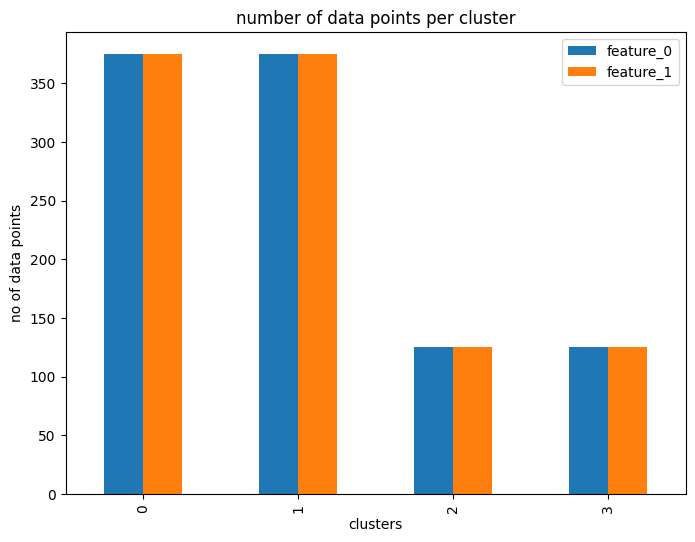

In [39]:
df.groupby(
    'cluster_label').count().reset_index().plot(kind='bar',
                                               x='cluster_label',
                                               figsize=(8,6),
                                               title=('number of data points per cluster'))

plt.xlabel("clusters")
plt.ylabel('no of data points')
plt.show()                                                
                                                